# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
#%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available'].copy()
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

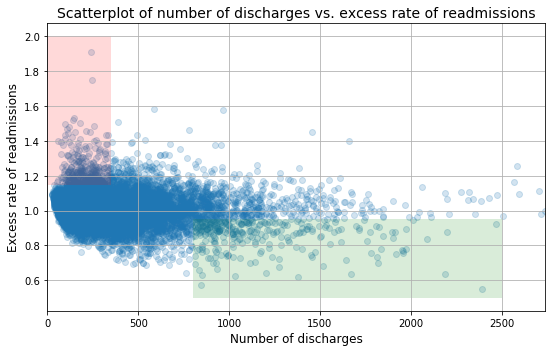

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### Part A.
The way the preliminary analysis has been conducted has several problems. First, the observations based on the plot are incomplete. By only considering the regions in the red and green boxes, we ignore the vast majority of the data. Furthermore, their placement is fairly arbitrary. For instance, the green region does appear to contain a number of hopsitals with low excess rates, but if we simply translated the box to the left, we would also see that there would also be many hospitals with small discharge numbers _and_ low excess rates. 

In the statistics section, the analysis is inadequate because it again ignores the majority of the data. By focusing on the extreme tails of the distribution, we miss what is happening in the middle region which constitutes most of our data. A proper hypothesis test will take into account every datapoint. The conclusions and recommendations reached from their analysis are therefore unfounded until a proper test is conducted. They also don't take into account other considerations that may complicate interpretations of the data without further research (these will be discussed below). 

### Part B.

One way of conducting a proper analysis is testing for a significant Pearson correlation. We can use a permutation approach, under the null hypothesis that there is no correlation. We will generate 10,000 permutations of the discharge data, and test how many have a Pearson r that is at least as extreme as the one observed in our data:

Observed Pearson r:  -0.09309554287590444
P-value for Pearson r under null hypothesis:  0.0


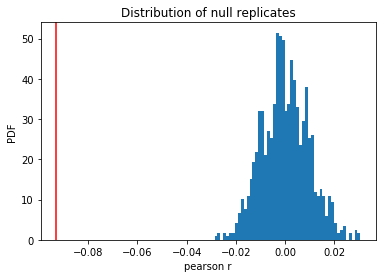

In [107]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

#Convert x and y to np arrays
x = np.asarray(x)
y = np.asarray(y)

# Compute observed correlation
r_obs = pearson_r(x, y)

# Initialize permutation replicates
perm_replicates = np.empty(1000)

# Draw replicates
for i in range(1000):
    # Permute  measurements
    x_permuted = np.random.permutation(x)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(x_permuted, y)

# Compute p-value
p = np.sum(perm_replicates <= r_obs) / len(perm_replicates)
print("Observed Pearson r: ", r_obs)
print('P-value for Pearson r under null hypothesis: ', p)
_ = plt.hist(perm_replicates, bins=50, density=True)
_ = plt.axvline(x=r_obs, color='red')
_ = plt.xlabel('pearson r')
_ = plt.ylabel('PDF')
_ = plt.title('Distribution of null replicates')

As we can see, the observed value of our correlation (indicated by red line), lies well below our distribution of null replicates, and the p-value is essentially zero (using 10,000 replicates). Using an alpha of 0.01, we can therefore reject the null hypothesis and conclude that there is a significant, negative relationship between the number of discharges and the excess ratio. We could also do a similar test but for the slope of the regression line:

The observed slope is:  -2.8565052943821946e-05
The p-value for the observed slope is: 0.0


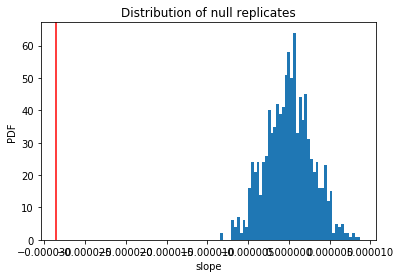

In [109]:
alpha = 0.01

#Function for generating permutations for linear regression
def draw_perms_linreg(x_data, y_data, size=1):
    """Perform permutation testing for null hypothesis of linear regression."""

    # Initialize replicates: perm_slope_reps, perm_intercept_reps
    perm_slope_reps = np.empty(size)
    perm_intercept_reps = np.empty(size)
    
    # Generate replicates
    for i in range(size):
        # Permute x
        x_permuted = np.random.permutation(x_data)
        # Calculate slope and intercept for permuted data
        perm_slope_reps[i], perm_intercept_reps[i] = np.polyfit(x_permuted, y_data, 1)
            
    return perm_slope_reps, perm_intercept_reps

#Compute observed slope parameter of data
slope_obs, intercept_obs = np.polyfit(x, y, 1)

# Generate 10,000 replicates of slope and intercept using permutation
perm_slope_reps, perm_intercept_reps = draw_perms_linreg(x, y, size=1000)

#Compute and print p-value for slope
p_value = sum(perm_slope_reps <= slope_obs) / len(perm_slope_reps)
print("The observed slope is: ", slope_obs)
print("The p-value for the observed slope is: {}".format(p_value))

# Plot the histogram
plt.figure()
_ = plt.hist(perm_slope_reps, bins=50)
_ = plt.axvline(x=slope_obs, color='red')
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
_ = plt.title('Distribution of null replicates')
plt.show()


Once again, we see that the observed slope is substantially less (i.e. more negative) than what we would expect under the null hypothesis. The p-value is also indistinguishable from zero.

To get an estimate of the true slope, we can use a bootstrap approach where we create bootstrap pairs from our x and y data and then construct a confidence interval around these:

The confidence interval for alpha=0.01 is: [-3.68815498e-05 -1.82398351e-05]


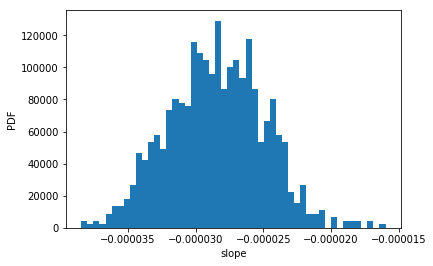

In [117]:
#Function for performing pairs bootstrap for linear regression
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

# Generate 10,000 replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(x, y, size=1000)

# Compute and print CI for slope
CI = np.percentile(bs_slope_reps, [(alpha/2)*100, (1-(alpha/2))*100])
print("The confidence interval for alpha={} is: {}".format(alpha, CI))

# Plot the histogram
plt.figure()
_ = plt.hist(bs_slope_reps, bins=50, density=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

We can be 99% certain that the true population slope lies between roughly -.000037 and -.000018. Because this slope is so small, we can get a better visual sense of the magnitude of the interval by plotting the regression lines for each bootstrapped sample and overlay it on our original data:

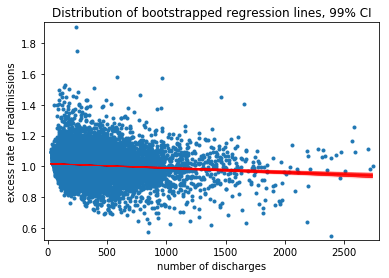

In [119]:

# Plot the data
_ = plt.plot(x, y, marker='.', linestyle='none')

# Specify min x and max x as endpoints for bootstrap lines:
x_line = np.array([min(x), max(x)])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('number of discharges')
_ = plt.ylabel('excess rate of readmissions')
_ = plt.title('Distribution of bootstrapped regression lines, 99% CI')
plt.margins(0.02)
plt.show()

Again, we can be 99% certain that the true population slope lies somewhere within the region shaded red. The plot above is more useful than the plot in the preliminary analysis for assessing the relationship between the two variables because it takes into account all datapoints. 

Although we have good evidence to conclude that there is in fact a negative relationship (i.e. lower number of discharges leads to increased excess rate of readmissions), it is important to consider the magnitude of this slope before we make any recommendations. The observed slope in our sample was -0.000029, which seems rather small. In terms of our units, this means that for every 1,000 additional discharges, the excess ratio decreases by just .029.

In the preliminary analysis, they suggest consolidating hospitals to decrease the excess rate of readmissions. This recommendation, however, may be misguided for several reasons. First, from a cost/benefit perspective, it may not be worth the considerable time, effort, and resources for such a small benefit. Second, it's not clear what the cause of readmissions is; one possibility is that care is actually _worse_ at large hospitals (due to longer waittimes, overworked staff, etc.), and individuals are therefore simply more reluctant to return to them. Before concluding that the higher readmission rate at smaller hospitals is due to worse care, we should attempt to follow those who are discharged at both smaller and larger hospitals and see if their health is actually significantly different. There are also several other confounding factors that may be at play here. For instance, if smaller hospitals are concentrated in more rural states, there could be differences in regulatory practices between the states that partially explains why care would be worse at these facilities. Consolidating hospitals in these regions would do little to address these differences. Obviously this is only a hypothesis, but it highlights the need for further analysis before serious recommendations can be made.

From these results alone, it's reasonable to focus additional time and money on studying these smaller hospitals in order to gain a better understanding of why they might be slightly underperforming. This research could lead to increased money being focused on education, training, or management that would bring these hospitals up to speed. As the data stand, I don't think there's any reason to conclude that we should jump headlong into mass consolidation of hospitals at undoubtedly great expense. 